In [1]:
import leidenalg
import scanpy, phate
import numpy as np
import scprep
import matplotlib.pyplot as plt
import pandas as pd

## Acute

In [2]:
acute = scanpy.read_h5ad('data/acute_all_cells.h5ad')

In [3]:
phate_op = phate.PHATE(random_state=42)
data_phate = phate_op.fit_transform(acute.to_df())

Calculating PHATE...
  Running PHATE on 27082 observations and 14583 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 15.05 seconds.
    Calculating KNN search...
    Calculated KNN search in 99.83 seconds.
    Calculating affinities...
    Calculated affinities in 17.64 seconds.
  Calculated graph and diffusion operator in 132.77 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 2.68 seconds.
    Calculating KMeans...
    Calculated KMeans in 10.29 seconds.
  Calculated landmark operator in 14.02 seconds.
  Calculating optimal t...
    Automatically selected t = 29
  Calculated optimal t in 1.46 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.44 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 3.84 seconds.
Calculated PHATE in 152.54 seconds.


In [7]:
res = 0.1
partition = leidenalg.find_partition(phate_op.graph.to_igraph(), leidenalg.RBConfigurationVertexPartition, seed=0,
                                     weights="weight", resolution_parameter=res, n_iterations=-1)

clusters = np.array(partition.membership).astype('str')
acute.obs[f'clusters_res_{res}'] = scprep.utils.sort_clusters_by_values(clusters, acute.obsm['X_phate'][:, 0]).astype(str)

<AxesSubplot:>

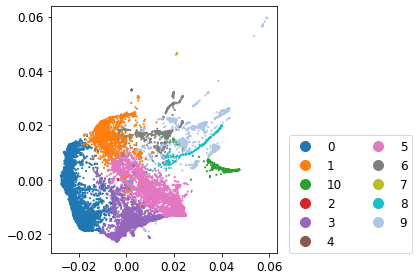

In [8]:
scprep.plot.scatter2d(data_phate, c=acute.obs[f'clusters_res_0.1'], legend_loc=(1.05,0))

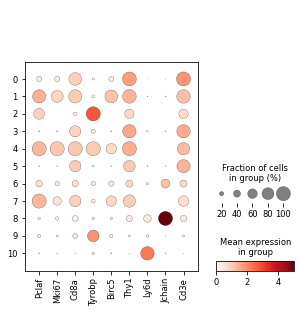

In [9]:
scanpy.pl.dotplot(acute, var_names=["Pclaf","Mki67","Cd8a","Tyrobp","Birc5","Thy1","Ly6d","Jchain","Cd3e"],
                  groupby='clusters_res_0.1')

## Subset to clusters 0-5 from res=0.1

In [10]:
acute_tcell = acute[acute.obs['clusters_res_0.1'].isin(['0', '1', '2', '3', '4', '5'])]

In [11]:
phate_op = phate.PHATE(random_state=42)
acute_tcell.obsm['X_phate'] = phate_op.fit_transform(acute_tcell.to_df())

Calculating PHATE...
  Running PHATE on 23187 observations and 14583 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 12.69 seconds.
    Calculating KNN search...
    Calculated KNN search in 67.92 seconds.
    Calculating affinities...
    Calculated affinities in 12.06 seconds.
  Calculated graph and diffusion operator in 92.90 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 1.74 seconds.
    Calculating KMeans...
    Calculated KMeans in 11.74 seconds.
  Calculated landmark operator in 14.58 seconds.
  Calculating optimal t...
    Automatically selected t = 27
  Calculated optimal t in 1.97 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.85 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 6.63 seconds.
Calculated PHATE in 116.93 seconds.


In [12]:
res = 0.3
partition = leidenalg.find_partition(phate_op.graph.to_igraph(), leidenalg.RBConfigurationVertexPartition, seed=0,
                                     weights="weight", resolution_parameter=res, n_iterations=-1)

clusters = np.array(partition.membership).astype('str')
acute_tcell.obs[f'clusters_res_{res}'] = scprep.utils.sort_clusters_by_values(clusters, acute_tcell.obsm['X_phate'][:, 0]).astype(str)

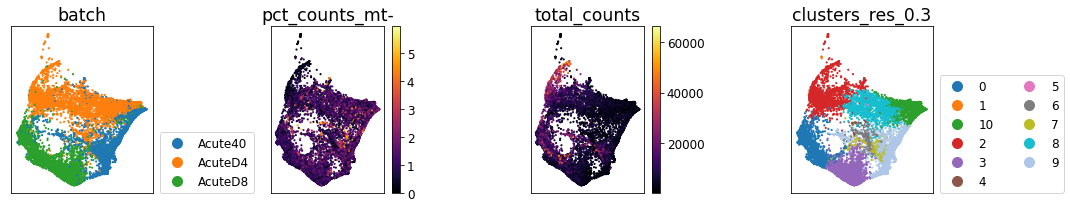

In [13]:
fig, ax = plt.subplots(1,4, figsize=(15,3)); ax=ax.flatten()

for i,key in enumerate(['batch', 'pct_counts_mt-', 'total_counts', 'clusters_res_0.3']):
    scprep.plot.scatter2d(acute_tcell.obsm['X_phate'], c=acute_tcell.obs[key], ax=ax[i], 
                          ticks=None, title=key, legend_loc=(1.05,0))
    
plt.tight_layout()

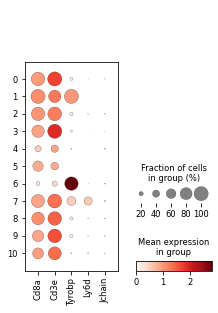

In [15]:
scanpy.pl.dotplot(acute_tcell, var_names=["Cd8a",'Cd3e',"Tyrobp","Ly6d","Jchain"],
                  groupby='clusters_res_0.3')

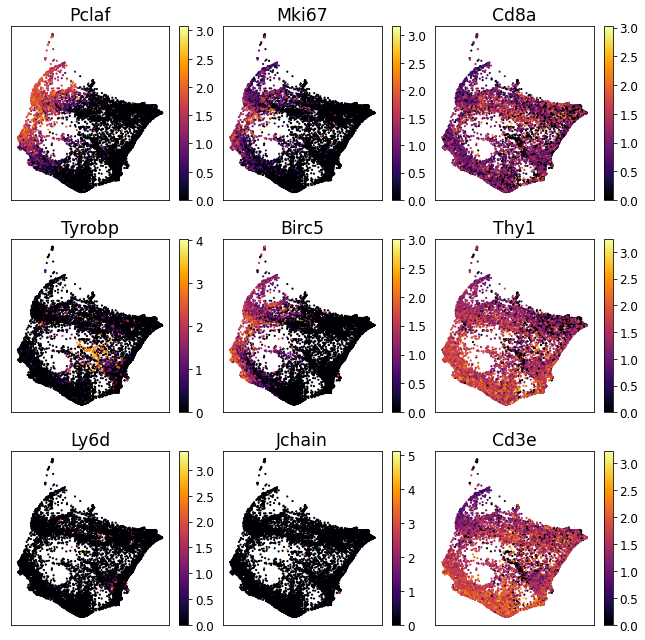

In [16]:
cell_type_annotaters = ["Pclaf","Mki67","Cd8a","Tyrobp","Birc5","Thy1","Ly6d","Jchain","Cd3e"]
fig, ax = plt.subplots(3,3, figsize=(9,9)); ax=ax.flatten()
for i,marker in enumerate(cell_type_annotaters):
    scprep.plot.scatter2d(acute_tcell.obsm['X_phate'], c=acute_tcell.to_df()[marker], ticks=None, ax=ax[i], title=marker)
    
plt.tight_layout()

In [17]:
acute_tcell = acute_tcell[~acute_tcell.obs['clusters_res_0.3'].isin(['6'])]

In [18]:
phate_op = phate.PHATE(random_state=42)
acute_tcell.obsm['X_phate'] = phate_op.fit_transform(acute_tcell.to_df())

Calculating PHATE...
  Running PHATE on 22901 observations and 14583 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 12.52 seconds.
    Calculating KNN search...
    Calculated KNN search in 69.94 seconds.
    Calculating affinities...
    Calculated affinities in 12.47 seconds.
  Calculated graph and diffusion operator in 95.14 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 1.72 seconds.
    Calculating KMeans...
    Calculated KMeans in 17.46 seconds.
  Calculated landmark operator in 20.32 seconds.
  Calculating optimal t...
    Automatically selected t = 36
  Calculated optimal t in 1.79 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.48 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 4.37 seconds.
Calculated PHATE in 122.11 seconds.


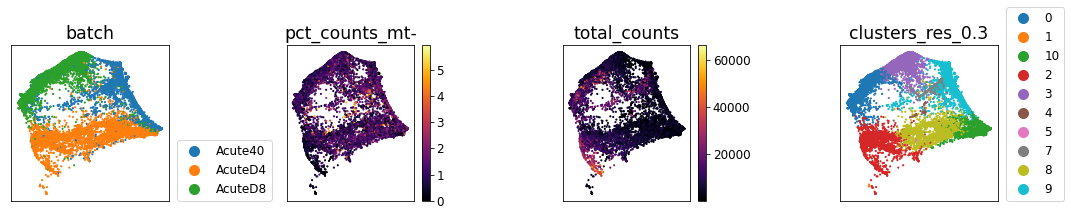

In [19]:
fig, ax = plt.subplots(1,4, figsize=(15,3)); ax=ax.flatten()

for i,key in enumerate(['batch', 'pct_counts_mt-', 'total_counts', 'clusters_res_0.3']):
    scprep.plot.scatter2d(acute_tcell.obsm['X_phate'], c=acute_tcell.obs[key], ax=ax[i], 
                          ticks=None, title=key, legend_loc=(1.05,0))
    
plt.tight_layout()

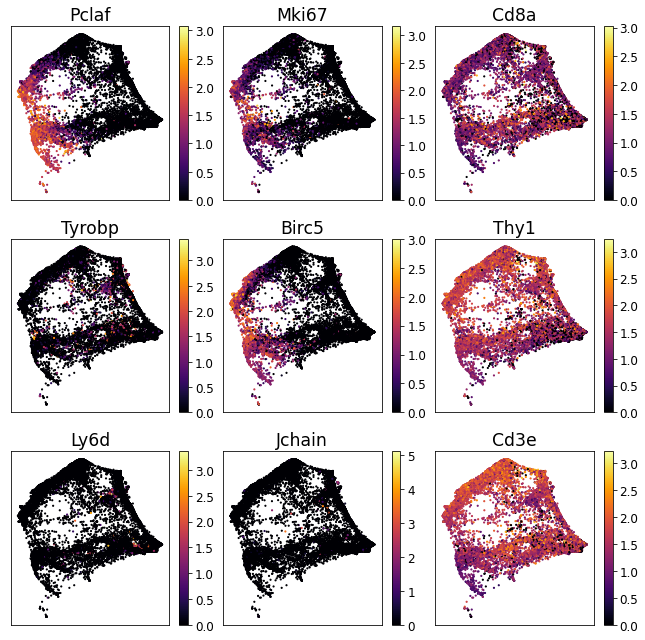

In [20]:
cell_type_annotaters = ["Pclaf","Mki67","Cd8a","Tyrobp","Birc5","Thy1","Ly6d","Jchain","Cd3e"]
fig, ax = plt.subplots(3,3, figsize=(9,9)); ax=ax.flatten()
for i,marker in enumerate(cell_type_annotaters):
    scprep.plot.scatter2d(acute_tcell.obsm['X_phate'], c=acute_tcell.to_df()[marker], ticks=None, ax=ax[i], title=marker)
    
plt.tight_layout()

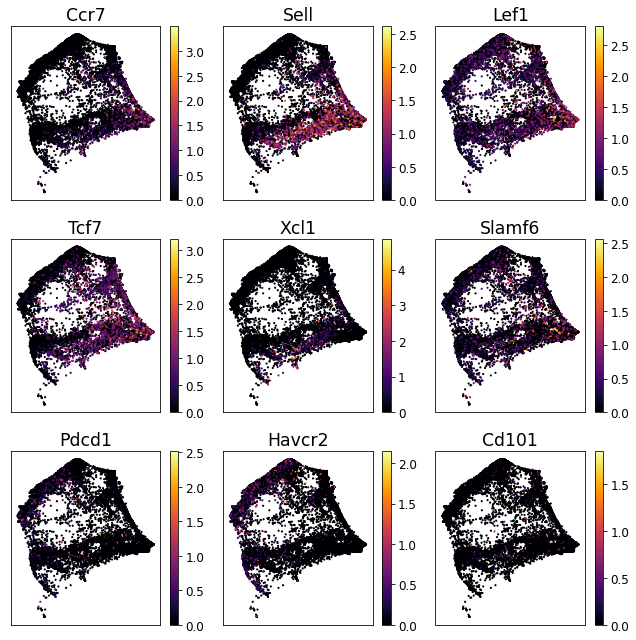

In [21]:
markers = ['Ccr7', 'Sell', 'Lef1', 'Tcf7', 'Xcl1', 'Slamf6', 'Pdcd1', 'Havcr2', 'Cd101']
fig, ax = plt.subplots(3,3, figsize=(9,9)); ax=ax.flatten()
for i,marker in enumerate(markers):
    scprep.plot.scatter2d(acute_tcell.obsm['X_phate'], c=acute_tcell.to_df()[marker], ticks=None, ax=ax[i], title=marker)
    
plt.tight_layout()

In [ ]:
APC_markers = ['Cd79a', 'Ebf1', 'Cd79b', 'Ly6d', 'Iglc3', 'Iglc2', 'H2-Ab1', 'H2-Aa', 'H2-Eb1', 'Cd74', 'Ms4a1']
acute_tcell = acute_tcell[~(np.sum(acute_tcell.to_df()[APC_markers] > 0, axis=1) > 2)]

In [27]:
acute_tcell.write('data/acute_tcells.h5ad')

## Chronic

In [28]:
chronic = scanpy.read_h5ad('data/chronic_all_cells.h5ad')

In [29]:
phate_op = phate.PHATE(random_state=42)
chronic.obsm['X_phate'] = phate_op.fit_transform(chronic.to_df())

Calculating PHATE...
  Running PHATE on 23160 observations and 14769 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 13.39 seconds.
    Calculating KNN search...
    Calculated KNN search in 107.56 seconds.
    Calculating affinities...
    Calculated affinities in 14.57 seconds.
  Calculated graph and diffusion operator in 135.73 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 2.23 seconds.
    Calculating KMeans...
    Calculated KMeans in 9.69 seconds.
  Calculated landmark operator in 12.98 seconds.
  Calculating optimal t...
    Automatically selected t = 33
  Calculated optimal t in 1.79 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.42 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 5.80 seconds.
Calculated PHATE in 156.72 seconds.


In [30]:
res = 0.3
partition = leidenalg.find_partition(phate_op.graph.to_igraph(), leidenalg.RBConfigurationVertexPartition, seed=0,
                                     weights="weight", resolution_parameter=res, n_iterations=-1)

clusters = np.array(partition.membership).astype('str')
chronic.obs[f'clusters_res_{res}'] = scprep.utils.sort_clusters_by_values(clusters, 
                                                                          chronic.obsm['X_phate'][:, 0]).astype(str)

<AxesSubplot:>

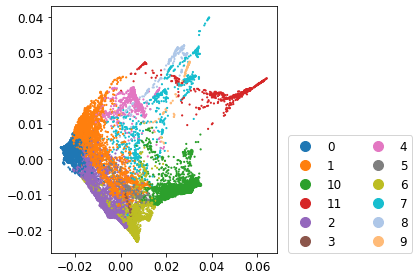

In [32]:
scprep.plot.scatter2d(chronic.obsm['X_phate'], c=chronic.obs[f'clusters_res_0.3'], legend_loc=(1.05,0))

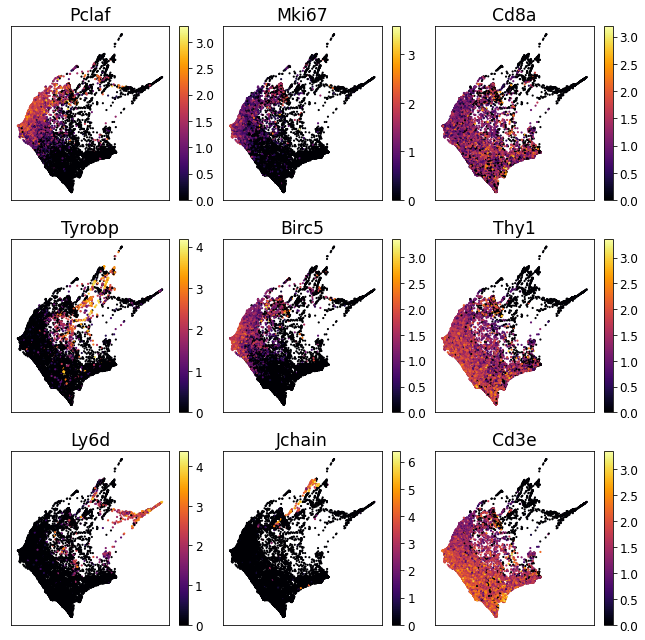

In [33]:
cell_type_annotaters = ["Pclaf","Mki67","Cd8a","Tyrobp","Birc5","Thy1","Ly6d","Jchain","Cd3e"]
fig, ax = plt.subplots(3,3, figsize=(9,9)); ax=ax.flatten()
for i,marker in enumerate(cell_type_annotaters):
    scprep.plot.scatter2d(chronic.obsm['X_phate'], c=chronic.to_df()[marker], ticks=None, ax=ax[i], title=marker)
    
plt.tight_layout()

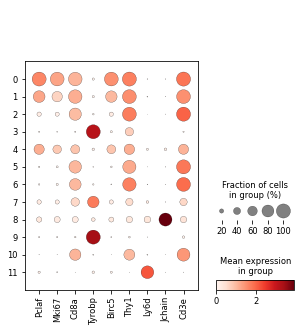

In [34]:
scanpy.pl.dotplot(chronic, var_names=["Pclaf","Mki67","Cd8a","Tyrobp","Birc5","Thy1","Ly6d","Jchain","Cd3e"],
                  groupby='clusters_res_0.3')

In [35]:
chronic_tcell = chronic[chronic.obs['clusters_res_0.3'].isin(['0', '1', '2', '4', '5', '6', '10'])]

In [36]:
phate_op = phate.PHATE(random_state=42)
chronic_tcell.obsm['X_phate'] = phate_op.fit_transform(chronic_tcell.to_df())

Calculating PHATE...
  Running PHATE on 21289 observations and 14769 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 12.22 seconds.
    Calculating KNN search...
    Calculated KNN search in 93.04 seconds.
    Calculating affinities...
    Calculated affinities in 14.15 seconds.
  Calculated graph and diffusion operator in 119.68 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 1.92 seconds.
    Calculating KMeans...
    Calculated KMeans in 9.95 seconds.
  Calculated landmark operator in 12.88 seconds.
  Calculating optimal t...
    Automatically selected t = 26
  Calculated optimal t in 1.72 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.40 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 5.56 seconds.
Calculated PHATE in 140.25 seconds.


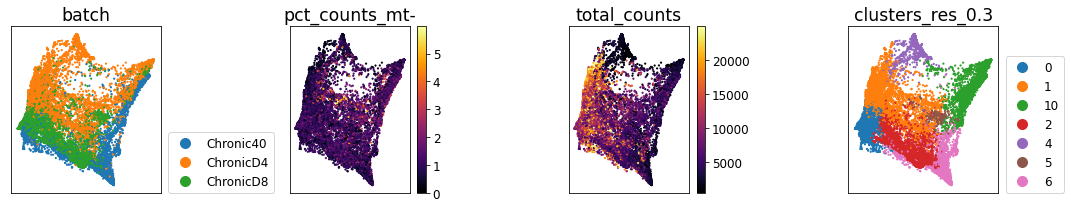

In [37]:
fig, ax = plt.subplots(1,4, figsize=(15,3)); ax=ax.flatten()

for i,key in enumerate(['batch', 'pct_counts_mt-', 'total_counts', 'clusters_res_0.3']):
    scprep.plot.scatter2d(chronic_tcell.obsm['X_phate'], c=chronic_tcell.obs[key], ax=ax[i], 
                          ticks=None, title=key, legend_loc=(1.05,0))
    
plt.tight_layout()

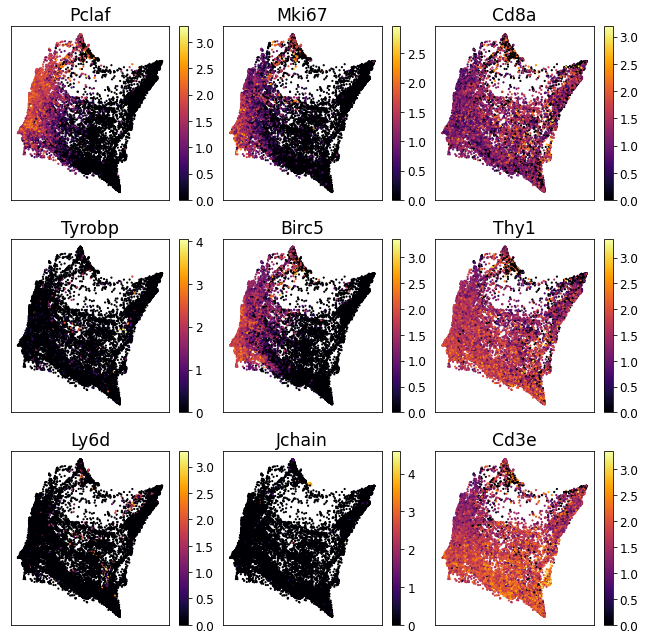

In [38]:
cell_type_annotaters = ["Pclaf","Mki67","Cd8a","Tyrobp","Birc5","Thy1","Ly6d","Jchain","Cd3e"]
fig, ax = plt.subplots(3,3, figsize=(9,9)); ax=ax.flatten()
for i,marker in enumerate(cell_type_annotaters):
    scprep.plot.scatter2d(chronic_tcell.obsm['X_phate'], c=chronic_tcell.to_df()[marker], ticks=None, ax=ax[i], title=marker)
    
plt.tight_layout()

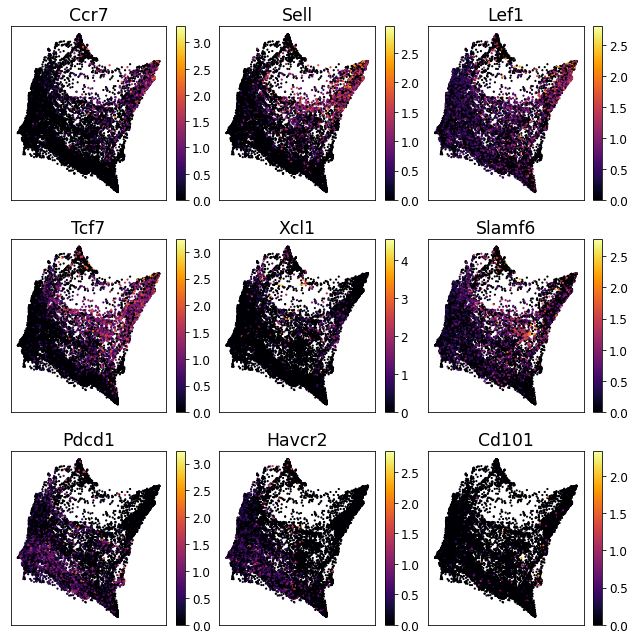

In [39]:
markers = ['Ccr7', 'Sell', 'Lef1', 'Tcf7', 'Xcl1', 'Slamf6', 'Pdcd1', 'Havcr2', 'Cd101']
fig, ax = plt.subplots(3,3, figsize=(9,9)); ax=ax.flatten()
for i,marker in enumerate(markers):
    scprep.plot.scatter2d(chronic_tcell.obsm['X_phate'], c=chronic_tcell.to_df()[marker], ticks=None, ax=ax[i], title=marker)
    
plt.tight_layout()

In [ ]:
APC_markers = ['Cd79a', 'Ebf1', 'Cd79b', 'Ly6d', 'Iglc3', 'Iglc2', 'H2-Ab1', 'H2-Aa', 'H2-Eb1', 'Cd74', 'Ms4a1']
chronic_tcell = chronic_tcell[~(np.sum(chronic_tcell.to_df()[APC_markers] > 0, axis=1) > 2)]

In [43]:
chronic_tcell.write('data/chronic_tcells.h5ad')